In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
from matplotlib import font_manager #한글을 사용하기 위해 matplotlib패키지 중에서 font_manager패키지를 가져오는 작업

#밑에 그림 참조(윈도우 기준 폰트 저장 장소)
# 여기에 있는 H2GPRM.TTF는 변경 가능함!!! 단, 한글이 되는 폰트로 찾아서 해야함!!!!!
font_fname = 'C:\\Windows\\Fonts\\gulim.ttc' 
font_family = font_manager.FontProperties(fname=font_fname).get_name() #자신이 지정한 폰트를 주피터 노트북에 적용하는 코드

plt.rcParams["font.family"] = font_family

print(font_family)#마지막으로 자신이 정한 코드가 작동되엇는지 확인하기 위해 프린트를 찍어봄

Gulim


In [3]:
path ="subway_result.csv"
import chardet
with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [4]:
data = pd.read_csv(path,encoding='EUC-KR')
#필요없는 행 삭제
del data["Unnamed: 0"]
#지하철역 이름 정리
data["지하철역"]=data["지하철역"].apply(lambda x:x.split("(")[0])

#호선 정리
data["호선명"]=data["호선명"].replace(["경인선","경부선","장항선"],"1호선")
data["호선명"]=data["호선명"].replace("일산선","3호선")
data["호선명"]=data["호선명"].replace(["과천선","안산선"],"4호선")
data["호선명"]=data["호선명"].replace(["9호선2~3단계","9호선2단계"],"9호선")
data

,사용월,년도,월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,...,16_17시 차이,17_18시 차이,18_19시 차이,19_20시 차이,20_21시 차이,21_22시 차이,22_23시 차이,23_24시 차이,00_01시 차이,01_02시 차이
0,202006,2020,6,1호선,종로5가,52,2,1935,4036,2674,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,202006,2020,6,1호선,종각,94,3,3286,4443,3385,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,202006,2020,6,1호선,동대문,495,8,14049,2376,9668,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,202006,2020,6,1호선,신설동,252,6,9370,2462,8823,...,10034,17278,34654,5456,3488,3017,192,-3886,-529,0
4,202006,2020,6,1호선,제기동,419,7,4701,2355,8346,...,7477,12893,11270,788,726,-533,-1896,-2593,-402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,2015,1,4호선,수유,76,1,21160,3652,56906,...,-11769,-22604,-59129,-103458,-70631,-56780,-59605,-45138,-12761,1
38086,201501,2015,1,4호선,미아,12,1,10667,1812,23354,...,-3298,-5125,-17443,-32873,-21214,-17242,-22749,-16490,-4445,0
38087,201501,2015,1,4호선,쌍문,38,0,22176,860,56130,...,-9209,-20366,-51516,-79471,-59848,-51532,-56322,-45917,-14414,0
38088,201501,2015,1,4호선,상계,34,7,14244,212,42099,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909


In [6]:
data2 = pd.read_csv("location.csv",encoding='EUC-KR')
#지하철역 정리
data2["전철역명"]=data2["전철역명"].apply(lambda x: x.split("(")[0])
data2["전철역명"]=data2["전철역명"].apply(lambda x: x.split("?")[0])
#원하는 컬럼만 남기고 drop
data2=data2.drop(["전철역코드","외부코드","사이버스테이션","X좌표","Y좌표","호선"],axis=1)
data2

,전철역명,X좌표(WGS),Y좌표(WGS)
0,가락시장,37.492522,127.118234
1,가락시장,37.492522,127.118234
2,종로3가,37.571607,126.991806
3,종로3가,37.571607,126.991806
4,종로3가,37.571607,126.991806
...,...,...,...
924,동백,37.269043,127.152716
925,초당,37.260752,127.159443
926,삼가,37.242115,127.168075
927,시청,37.239151,127.178406


In [7]:
data2.head(20)

,전철역명,X좌표(WGS),Y좌표(WGS)
0,가락시장,37.492522,127.118234
1,가락시장,37.492522,127.118234
2,종로3가,37.571607,126.991806
3,종로3가,37.571607,126.991806
4,종로3가,37.571607,126.991806
5,오금,37.502162,127.128111
6,오금,37.502162,127.128111
7,동대문,37.571420,127.009745
8,동대문,37.571420,127.009745
9,동대문역사문화공원,37.565138,127.007896


In [10]:
data=pd.merge(data, data2, how= "left", left_on="지하철역", right_on="전철역명")

In [30]:
data[data["X좌표(WGS)"].isnull()]["지하철역"].unique()

array(['서울역', '이수', '삼전', '석촌고분', '송파나루', '한성백제', '둔촌오륜', '중앙보훈병원', '여주',
       '임진강', '인천공항1터미널', '인천공항2터미널', '북한산우이', '솔밭공원', '4.19민주묘지', '가오리',
       '화계', '삼양', '삼양사거리', '솔샘', '북한산보국문', '정릉', '지평', '신천', '쌍용동',
       '동두천 중앙'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84316 entries, 0 to 84315
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   사용월           84316 non-null  int64  
 1   년도            84316 non-null  int64  
 2   월             84316 non-null  int64  
 3   호선명           84316 non-null  object 
 4   지하철역          84316 non-null  object 
 5   04시-05시 승차인원  84316 non-null  int64  
 6   04시-05시 하차인원  84316 non-null  int64  
 7   05시-06시 승차인원  84316 non-null  int64  
 8   05시-06시 하차인원  84316 non-null  int64  
 9   06시-07시 승차인원  84316 non-null  int64  
 10  06시-07시 하차인원  84316 non-null  int64  
 11  07시-08시 승차인원  84316 non-null  int64  
 12  07시-08시 하차인원  84316 non-null  int64  
 13  08시-09시 승차인원  84316 non-null  int64  
 14  08시-09시 하차인원  84316 non-null  int64  
 15  09시-10시 승차인원  84316 non-null  int64  
 16  09시-10시 하차인원  84316 non-null  int64  
 17  10시-11시 승차인원  84316 non-null  int64  
 18  10시-11시 하차인원  84316 non-nu

In [13]:
#상차인원, 하차인원, 차이인원 별 컬럼 나누기
col_default=data.columns[1:5]
col_on=col_default.append(data.filter(regex="승차").columns)
col_off=col_default.append(data.filter(regex="하차").columns)
col_diff=col_default.append(data.filter(regex="차이").columns)

In [14]:
#상차인원, 하차인원, 차이인원 별 테이블만들기
data_on=data[col_on]
data_off=data[col_off]
data_diff=data[col_diff]

In [15]:
#data_on.rename(columns={data_on.columns[4:][0]:data_on.columns[4:][0][:-5]},inplace=True)

In [16]:
#data_on  컬럼 수정('승차인원' 제거)
for i in range(4,len(data_on.columns)):
    data_on.rename(columns={data_on.columns[i]:data_on.columns[i][:-5]},inplace=True)
data_on

C:\Users\acorn-508\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
0,2020,6,1호선,종로5가,52,1935,2674,5086,7527,11391,...,51717,69285,101595,49553,30809,25803,19853,6429,17,0
1,2020,6,1호선,종각,94,3286,3385,5367,8424,10634,...,58818,127045,207821,87619,72988,83784,65597,24210,26,0
2,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
3,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
4,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,2015,1,4호선,상계,34,14244,42099,106446,94046,57091,...,28775,30494,29730,21171,15801,14139,14087,5182,803,4
84312,2015,1,4호선,노원,100,11832,30613,64281,73239,45325,...,41374,44279,44203,33758,37979,33479,33300,17968,2873,3
84313,2015,1,4호선,노원,100,11832,30613,64281,73239,45325,...,41374,44279,44203,33758,37979,33479,33300,17968,2873,3
84314,2015,1,4호선,노원,100,11832,30613,64281,73239,45325,...,41374,44279,44203,33758,37979,33479,33300,17968,2873,3


In [17]:
#data_off  컬럼 수정('하차인원' 제거)
for i in range(4,len(data_off.columns)):
    data_off.rename(columns={data_off.columns[i]:data_off.columns[i][:-5]},inplace=True)
data_off

C:\Users\acorn-508\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
0,2020,6,1호선,종로5가,2,4036,16497,41395,109592,64204,...,27918,25165,23342,13602,6055,4553,3300,2288,234,0
1,2020,6,1호선,종각,3,4443,26566,106806,249411,135873,...,31451,36523,46786,25779,10060,6563,4290,2630,131,1
2,2020,6,1호선,동대문,8,2376,7451,13436,25850,23863,...,18298,19074,19307,21241,14320,11315,10720,10726,920,0
3,2020,6,1호선,동대문,8,2376,7451,13436,25850,23863,...,18298,19074,19307,21241,14320,11315,10720,10726,920,0
4,2020,6,1호선,동대문,8,2376,7451,13436,25850,23863,...,18298,19074,19307,21241,14320,11315,10720,10726,920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,2015,1,4호선,상계,7,212,8301,9104,22270,20344,...,37665,44644,65398,72982,52842,45875,45694,37194,11385,913
84312,2015,1,4호선,노원,4,654,9336,14674,33083,41572,...,51031,60364,90019,93903,62732,53428,50256,38678,13345,377
84313,2015,1,4호선,노원,4,654,9336,14674,33083,41572,...,51031,60364,90019,93903,62732,53428,50256,38678,13345,377
84314,2015,1,4호선,노원,4,654,9336,14674,33083,41572,...,51031,60364,90019,93903,62732,53428,50256,38678,13345,377


In [18]:
#data_diff  컬럼 수정('차이' 제거)
for i in range(4,len(data_diff.columns)):
    data_diff.rename(columns={data_diff.columns[i]:data_diff.columns[i][:-3]},inplace=True)
data_diff

C:\Users\acorn-508\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,년도,월,호선명,지하철역,04_05시,05_06시,06_07시,07_08시,08_09시,09_10시,...,16_17시,17_18시,18_19시,19_20시,20_21시,21_22시,22_23시,23_24시,00_01시,01_02시
0,2020,6,1호선,종로5가,50,-2101,-13823,-36309,-102065,-52813,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,2020,6,1호선,종각,91,-1157,-23181,-101439,-240987,-125239,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,2020,6,1호선,동대문,487,11673,2217,1094,-7178,-6475,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,2020,6,1호선,동대문,487,11673,2217,1094,-7178,-6475,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
4,2020,6,1호선,동대문,487,11673,2217,1094,-7178,-6475,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,2015,1,4호선,상계,27,14032,33798,97342,71776,36747,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909
84312,2015,1,4호선,노원,96,11178,21277,49607,40156,3753,...,-9657,-16085,-45816,-60145,-24753,-19949,-16956,-20710,-10472,-374
84313,2015,1,4호선,노원,96,11178,21277,49607,40156,3753,...,-9657,-16085,-45816,-60145,-24753,-19949,-16956,-20710,-10472,-374
84314,2015,1,4호선,노원,96,11178,21277,49607,40156,3753,...,-9657,-16085,-45816,-60145,-24753,-19949,-16956,-20710,-10472,-374


In [19]:
#data[조건1(연도:2020) &조건2(월:6) &조건3(지하철역:종로5가)]
data_on[(data_on["년도"]==2020)
     & (data_on["월"]== 6)
     #& (data_on["호선명"]=="5호선")
     & (data_on["지하철역"]=="화곡")
     ]

,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
332,2020,6,5호선,화곡,82,20876,39844,117120,142892,65259,...,30769,33962,35461,21919,16247,14000,11280,4137,6,0


In [20]:
#data[조건1(연도:2020) &조건2(월:6) &조건3(지하철역:종로5가)]
# x축 깂
data_on[(data_on["년도"]==2020)&(data_on["월"]== 6)& (data_on["지하철역"]=="화곡")].columns[4:]

Index(['04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '00시-01시', '01시-02시'],
      dtype='object')

In [21]:
data_off[(data_off["년도"]==2020)&(data_off["월"]== 6)& (data_off["지하철역"]=="화곡")].columns[4:]

Index(['04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '00시-01시', '01시-02시'],
      dtype='object')

In [22]:
data_diff[(data_diff["년도"]==2020)&(data_diff["월"]== 6)& (data_diff["지하철역"]=="화곡")].columns[4:]

Index(['04_05시', '05_06시', '06_07시', '07_08시', '08_09시', '09_10시', '10_11시',
       '11_12시', '12_13시', '13_14시', '14_15시', '15_16시', '16_17시', '17_18시',
       '18_19시', '19_20시', '20_21시', '21_22시', '22_23시', '23_24시', '00_01시',
       '01_02시'],
      dtype='object')

In [23]:
#data[조건1(연도:2020) &조건2(월:6) &조건3(지하철역:종로5가)]
# y축 값
data_on[(data_on["년도"]==2020)& (data_on["월"]== 6)& (data_on["지하철역"]=="화곡")].values[0][4:]

array([82, 20876, 39844, 117120, 142892, 65259, 38367, 32803, 33485,
       31715, 27101, 26724, 30769, 33962, 35461, 21919, 16247, 14000,
       11280, 4137, 6, 0], dtype=object)

# 

# 그래프그리기

## 1.시간별 인원현황

In [24]:
data_on[data_on["지하철역"]=="소요산"].tail(25)

,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
53496,2017,1,경원선,소요산,66,1125,1315,5710,6125,6776,...,12072,9891,4688,3209,1902,1282,608,292,4,0
55649,2016,12,경원선,소요산,48,1268,1423,6587,6693,7150,...,12577,10073,5073,3391,2076,1438,630,282,4,0
56815,2016,11,경원선,소요산,87,1326,1596,6381,6793,6417,...,18816,14015,6485,3661,1943,1374,556,307,3,0
57463,2016,10,경원선,소요산,122,1358,1848,7048,7345,7523,...,29580,22584,11163,5439,2648,1495,629,229,7,0
59582,2016,9,경원선,소요산,91,1227,1759,7024,7160,7313,...,18893,16819,9802,5725,2766,1685,639,248,9,0
60393,2016,8,경원선,소요산,113,1288,2004,7686,7950,7840,...,23492,22039,13824,7724,3690,2178,837,303,5,0
61600,2016,7,경원선,소요산,64,1307,1938,6710,7165,7981,...,20101,17593,10259,6412,3501,2038,828,361,11,0
62449,2016,6,경원선,소요산,60,1409,1888,6883,7240,7609,...,19530,17316,10108,6191,3505,2162,874,257,8,0
63562,2016,5,경원선,소요산,65,1458,1891,6837,7543,7796,...,21170,18038,10536,6360,3514,1955,897,333,8,0
65243,2016,4,경원선,소요산,66,1271,1787,6355,7196,7198,...,21585,17036,9052,5607,2984,1815,742,287,7,0


In [51]:
data_on[data_on["지하철역"]=="서빙고"].tail(50)

,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
9610,2019,2,경원선,서빙고,30,779,1372,2348,3136,2854,...,3613,4908,6256,2680,2171,1842,1211,361,16,1
10490,2019,1,경원선,서빙고,34,963,1536,2872,3840,3102,...,3974,5791,7699,3061,2724,1960,1364,370,32,0
10958,2018,12,경원선,서빙고,34,918,1641,2938,3864,3650,...,4596,5847,7492,2890,2879,1959,1806,438,43,0
11478,2018,11,경원선,서빙고,38,1060,1758,3410,4410,3905,...,4538,6498,7799,3172,2630,2428,1721,395,31,0
12102,2018,10,경원선,서빙고,46,1081,1899,3674,4326,4171,...,4713,6224,8168,3438,2851,3412,2170,473,26,0
13015,2018,9,경원선,서빙고,37,965,1701,3064,3898,3749,...,4158,5557,7125,3294,2996,2559,1876,559,35,0
13427,2018,8,경원선,서빙고,69,977,1720,3101,3733,3178,...,4080,5445,7494,3394,2801,2616,1797,590,41,0
13986,2018,7,경원선,서빙고,61,1020,1787,3241,4171,3527,...,4317,5941,8028,3537,3145,3068,2204,640,34,0
14377,2018,6,경원선,서빙고,43,1136,1812,3237,4160,3785,...,4615,5874,7441,3397,3109,3175,2265,603,34,0
15475,2018,5,경원선,서빙고,32,1076,1791,3495,4346,4295,...,4689,6456,7675,3578,3266,2854,2258,538,44,0


In [30]:
data_on[(data_on["년도"]==2020)&(data_on["호선명"]=="1호선")]

,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
0,2020,6,1호선,종로5가,52,1935,2674,5086,7527,11391,...,51717,69285,101595,49553,30809,25803,19853,6429,17,0
1,2020,6,1호선,종각,94,3286,3385,5367,8424,10634,...,58818,127045,207821,87619,72988,83784,65597,24210,26,0
2,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
3,2020,6,1호선,신설동,252,9370,8823,17577,23934,16919,...,28207,38635,61218,23939,15097,13648,9959,3493,17,0
4,2020,6,1호선,제기동,419,4701,8346,20972,29749,21926,...,35450,36425,36996,18432,11640,8846,7071,2633,6,0
5,2020,6,1호선,청량리,1341,11435,15231,40635,48887,32649,...,42395,43729,41397,24698,19006,12942,9380,3661,35,0
596,2020,6,1호선,종로3가,197,4327,3499,4868,8573,11689,...,55772,67261,99469,59284,43912,48623,40059,14301,29,1
597,2020,6,1호선,시청,14,1579,2965,5914,7538,8106,...,32540,64843,129947,48737,37152,37571,25019,8266,5,0
598,2020,6,1호선,동묘앞,92,3482,3095,5988,7916,7012,...,27373,28655,24651,12708,6766,5570,3866,1321,1,0
599,2020,6,1호선,서울역,703,9281,11839,34932,59766,41216,...,69070,123504,198390,94455,61917,61209,41730,15428,35,0


연도를 입력하세요(2015~2020): 2020
월을 입력하세요(숫자만 입력): 5
역을 입력하세요(예시/화곡역->화곡): 안양


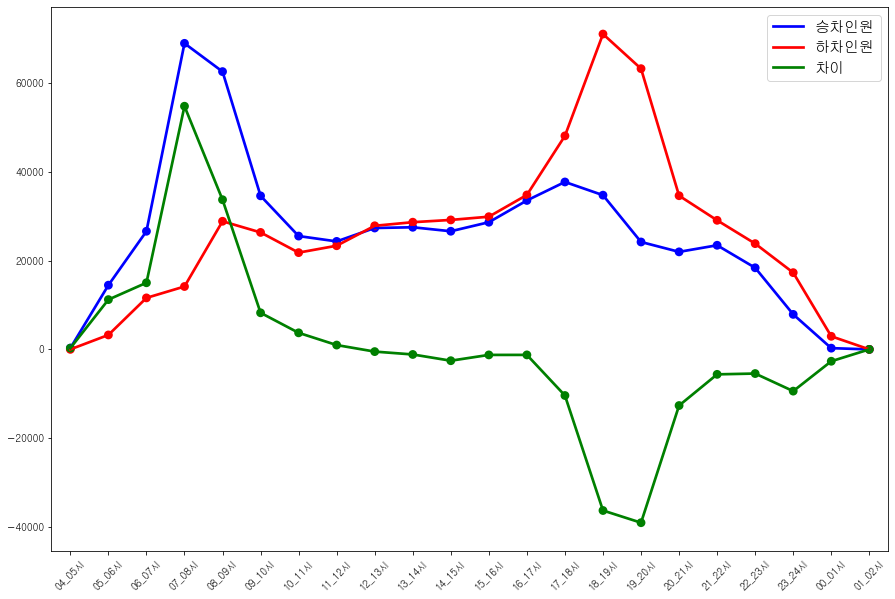

In [25]:
year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))
station=input("역을 입력하세요(예시/화곡역->화곡): ")

# year = 2020
# month = 6
# station = "화곡"

plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')


axes = plt.gca()

sns.pointplot(x=data_on[(data_on["년도"]==year)&(data_on["월"]== month)& (data_on["지하철역"]==station)].columns[4:],
               y=data_on[(data_on["년도"]==year)& (data_on["월"]== month)& (data_on["지하철역"]==station)].values[0][4:],
               color="b",
             ax=axes)
sns.pointplot(x=data_off[(data_off["년도"]==year)&(data_off["월"]== month)& (data_off["지하철역"]==station)].columns[4:],
               y=data_off[(data_off["년도"]==year)& (data_off["월"]== month)& (data_off["지하철역"]==station)].values[0][4:],
                color="r",
             ax=axes)
sns.pointplot(x=data_diff[(data_diff["년도"]==year)&(data_diff["월"]== month)& (data_diff["지하철역"]==station)].columns[4:],
               y=data_diff[(data_diff["년도"]==year)& (data_diff["월"]== month)& (data_diff["지하철역"]==station)].values[0][4:],
                color="g",
             ax=axes)



plt.legend(handles=axes.lines[::23], labels=["승차인원","하차인원","차이"], loc=1, fontsize=15)
# leg = axes.get_legend()
# leg.legendHandles[0].set_color('blue')
# leg.legendHandles[1].set_color('red')
# leg.legendHandles[2].set_color('green')


plt.xticks(rotation=45)
plt.show()

## 2. 호선별 평균 현황

연도를 입력하세요(2015~2020): 2018
월을 입력하세요(숫자만 입력): 3
호선을 입력하세요(숫자만 입력): 2


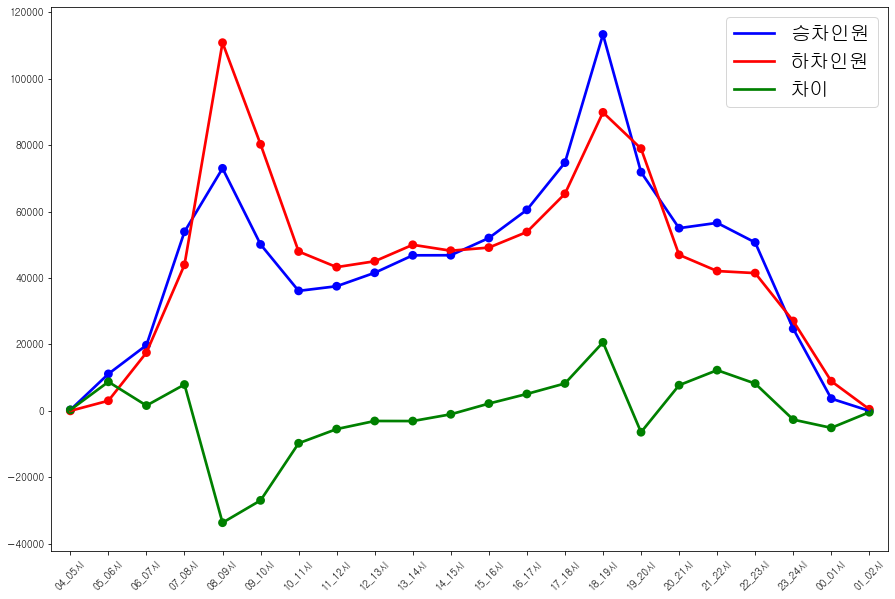

In [27]:
year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))
line=input("호선을 입력하세요(숫자만 입력): ")



plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')

axes = plt.gca()

sns.pointplot(x=data_on[(data_on["호선명"]==line+"호선")&(data_on["년도"]==year)&(data_on["월"]==month)].groupby("호선명")[data_on.columns[4:]].mean().columns,
               y=data_on[(data_on["호선명"]==line+"호선")&(data_on["년도"]==year)&(data_on["월"]==month)].groupby("호선명")[data_on.columns[4:]].mean().values[0],
               color="b")
sns.pointplot(x=data_off[(data_on["호선명"]==line+"호선")&(data_off["년도"]==year)&(data_off["월"]==month)].groupby("호선명")[data_off.columns[4:]].mean().columns,
               y=data_off[(data_off["호선명"]==line+"호선")&(data_off["년도"]==year)&(data_off["월"]==month)].groupby("호선명")[data_off.columns[4:]].mean().values[0],
               color="r")
sns.pointplot(x=data_diff[(data_on["호선명"]==line+"호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]==line+"호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="g")

plt.legend(handles=axes.lines[::23], labels=["승차인원","하차인원","차이"], loc=1, fontsize=20)

plt.xticks(rotation=45)
plt.show()

## 3.지하철 1~9호선 혼잡도 비교 

In [32]:
data_diff[data_diff["호선명"]=="2호선"]

,년도,월,호선명,지하철역,04_05시,05_06시,06_07시,07_08시,08_09시,09_10시,...,16_17시,17_18시,18_19시,19_20시,20_21시,21_22시,22_23시,23_24시,00_01시,01_02시
6,2020,6,2호선,시청,15,-501,-13154,-67961,-192867,-85088,...,19540,62216,147918,47596,31313,29671,19407,4576,-119,0
7,2020,6,2호선,을지로입구,103,302,-21851,-114578,-278676,-137978,...,31945,103402,205929,80340,80182,53726,34586,6767,-3082,-1
8,2020,6,2호선,을지로3가,12,-780,-18208,-63263,-135451,-60504,...,16034,51579,100812,37078,26524,30501,27515,11480,-304,-1
9,2020,6,2호선,을지로4가,11,-62,-10455,-30614,-72082,-34842,...,12080,37839,59692,27208,13641,10310,7676,2233,-158,-1
10,2020,6,2호선,동대문역사문화공원,241,7039,-2989,-19004,-43995,-23094,...,15338,19934,21553,859,4732,10460,6216,-1636,-582,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37991,2015,1,2호선,시청,42,-342,-15979,-95478,-208183,-67865,...,19701,45819,131007,76621,50445,51735,34345,13126,914,-98
38026,2015,1,2호선,도림천,0,-30,323,-422,-2446,-111,...,257,766,1017,-712,-289,-451,-817,-922,-308,-2
38027,2015,1,2호선,양천구청,20,3228,9279,28499,19813,11013,...,-3759,-6267,-13248,-20761,-14176,-13682,-13740,-13044,-4640,-33
38028,2015,1,2호선,신정네거리,50,8332,12375,45667,36680,17294,...,-5698,-10521,-24130,-30744,-17935,-19201,-20521,-15349,-5110,-309


연도를 입력하세요(2015~2020): 2020
월을 입력하세요(숫자만 입력): 5


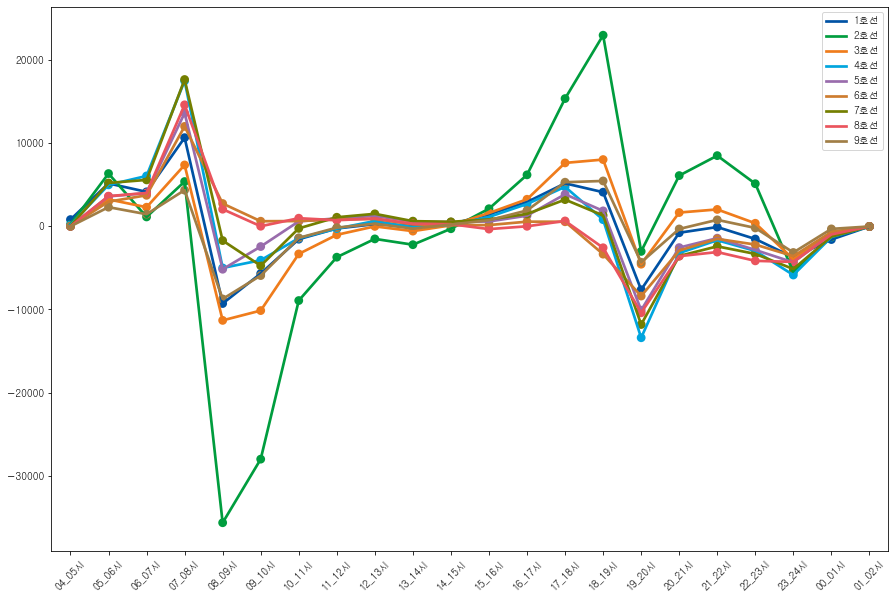

In [24]:
plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')
axes = plt.gca()

year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))

sns.pointplot(x=data_diff[(data_on["호선명"]=="1호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="1호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#0052A4")
sns.pointplot(x=data_diff[(data_on["호선명"]=="2호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="2호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#009D3E")
sns.pointplot(x=data_diff[(data_on["호선명"]=="3호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="3호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#EF7C1C")
sns.pointplot(x=data_diff[(data_on["호선명"]=="4호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="4호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#00A5DE")
sns.pointplot(x=data_diff[(data_on["호선명"]=="5호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="5호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#996CAC")
sns.pointplot(x=data_diff[(data_on["호선명"]=="6호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="6호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#CD7C2F")
sns.pointplot(x=data_diff[(data_on["호선명"]=="7호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="7호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#747F00")
sns.pointplot(x=data_diff[(data_on["호선명"]=="8호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="8호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#EA545D")
sns.pointplot(x=data_diff[(data_on["호선명"]=="9호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="9호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#A17E46")


plt.legend(handles=axes.lines[::23], labels=["1호선","2호선","3호선","4호선","5호선","6호선","7호선","8호선","9호선"], loc=1, fontsize=10)

plt.xticks(rotation=45)
plt.show()